In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
from datetime import datetime
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold
from sklearn.decomposition import PCA,KernelPCA
import lightgbm as lgb

import sys
sys.path.insert(0,'../../') 
from helpers import *
from MAP_estimator import MAP_estimator

# Algorithm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'

In [2]:
v_family = pd.read_pickle(data_path+'v_family.pkl')
train_y = pd.read_csv(data_path+'train_Y.csv')

In [3]:
v_family = pd.merge(train_y,v_family,on='sample_name')

In [4]:
v_family.head()

,sample_name,phenotype_status,TCRBV01,TCRBV02,TCRBV03,TCRBV04,TCRBV05,TCRBV06,TCRBV07,TCRBV08,...,TCRBV23,TCRBV24,TCRBV25,TCRBV26,TCRBV27,TCRBV28,TCRBV29,TCRBV30,TCRBVA,null
0,HIP09097,0,58,5739,5149,4788,14835,16102,14725,0,...,164,1735,1182,0,3705,8783,3348,2008,1,117
1,HIP05561,0,78,6991,3122,11233,21879,21829,19551,0,...,267,3924,1473,0,3645,4939,5093,5459,0,88
2,HIP13856,1,163,11561,9269,13962,37257,40621,35683,0,...,701,2286,2977,0,10475,3430,5926,8790,6,291
3,HIP05398,0,91,6253,5427,13626,22761,35044,26620,0,...,337,2922,2704,0,8722,8320,6265,9918,3,227
4,HIP13975,1,204,13722,11604,17502,37883,37843,34625,0,...,451,2294,2596,0,7435,3238,6968,11053,6,247


In [8]:
vFamilyName = v_family.drop(['sample_name','phenotype_status'],axis=1).columns.values
vF = [i.replace('TCRBV','') for i in vFamilyName]

In [12]:
count_l = dict()
pos_count = []
neg_count = []
for v in vFamilyName:
    count_l[v] = v_family[v].mean()
    neg_count.append(v_family[v_family['phenotype_status']==0][v].mean())
    pos_count.append(v_family[v_family['phenotype_status']==1][v].mean())
   

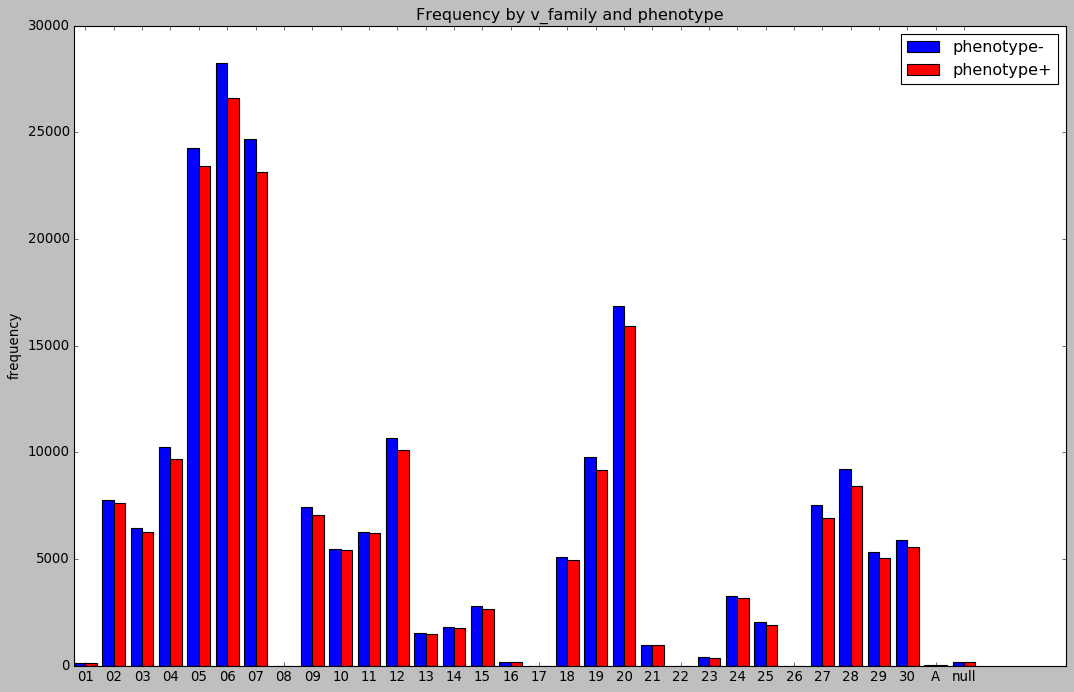

In [13]:
N = len(vFamilyName)

ind = np.arange(N)    # the x locations for the groups
width = 0.4    # the width of the bars: can also be len(x) sequence

plt.style.use('classic')
plt.figure(figsize=(16,10))
p1 = plt.bar(ind, neg_count, width,color='b')
p2 = plt.bar(ind+width, pos_count, width,color='r')

plt.ylabel('frequency')
plt.title('Frequency by v_family and phenotype')
plt.xticks(ind+width, vF)
plt.legend((p1[0], p2[0]), ('phenotype-', 'phenotype+'), loc='best')

plt.show()

In [ ]:
# v_family = pd.read_pickle(data_path+'v_family.pkl')
# train_y = pd.read_csv(data_path+'train_Y.csv')
# v_family = pd.merge(train_y,v_family,on='sample_name')

# vFamilyName = v_family.drop(['sample_name','phenotype_status'],axis=1).columns.values
# vF = [i.replace('TCRBV','') for i in vFamilyName]

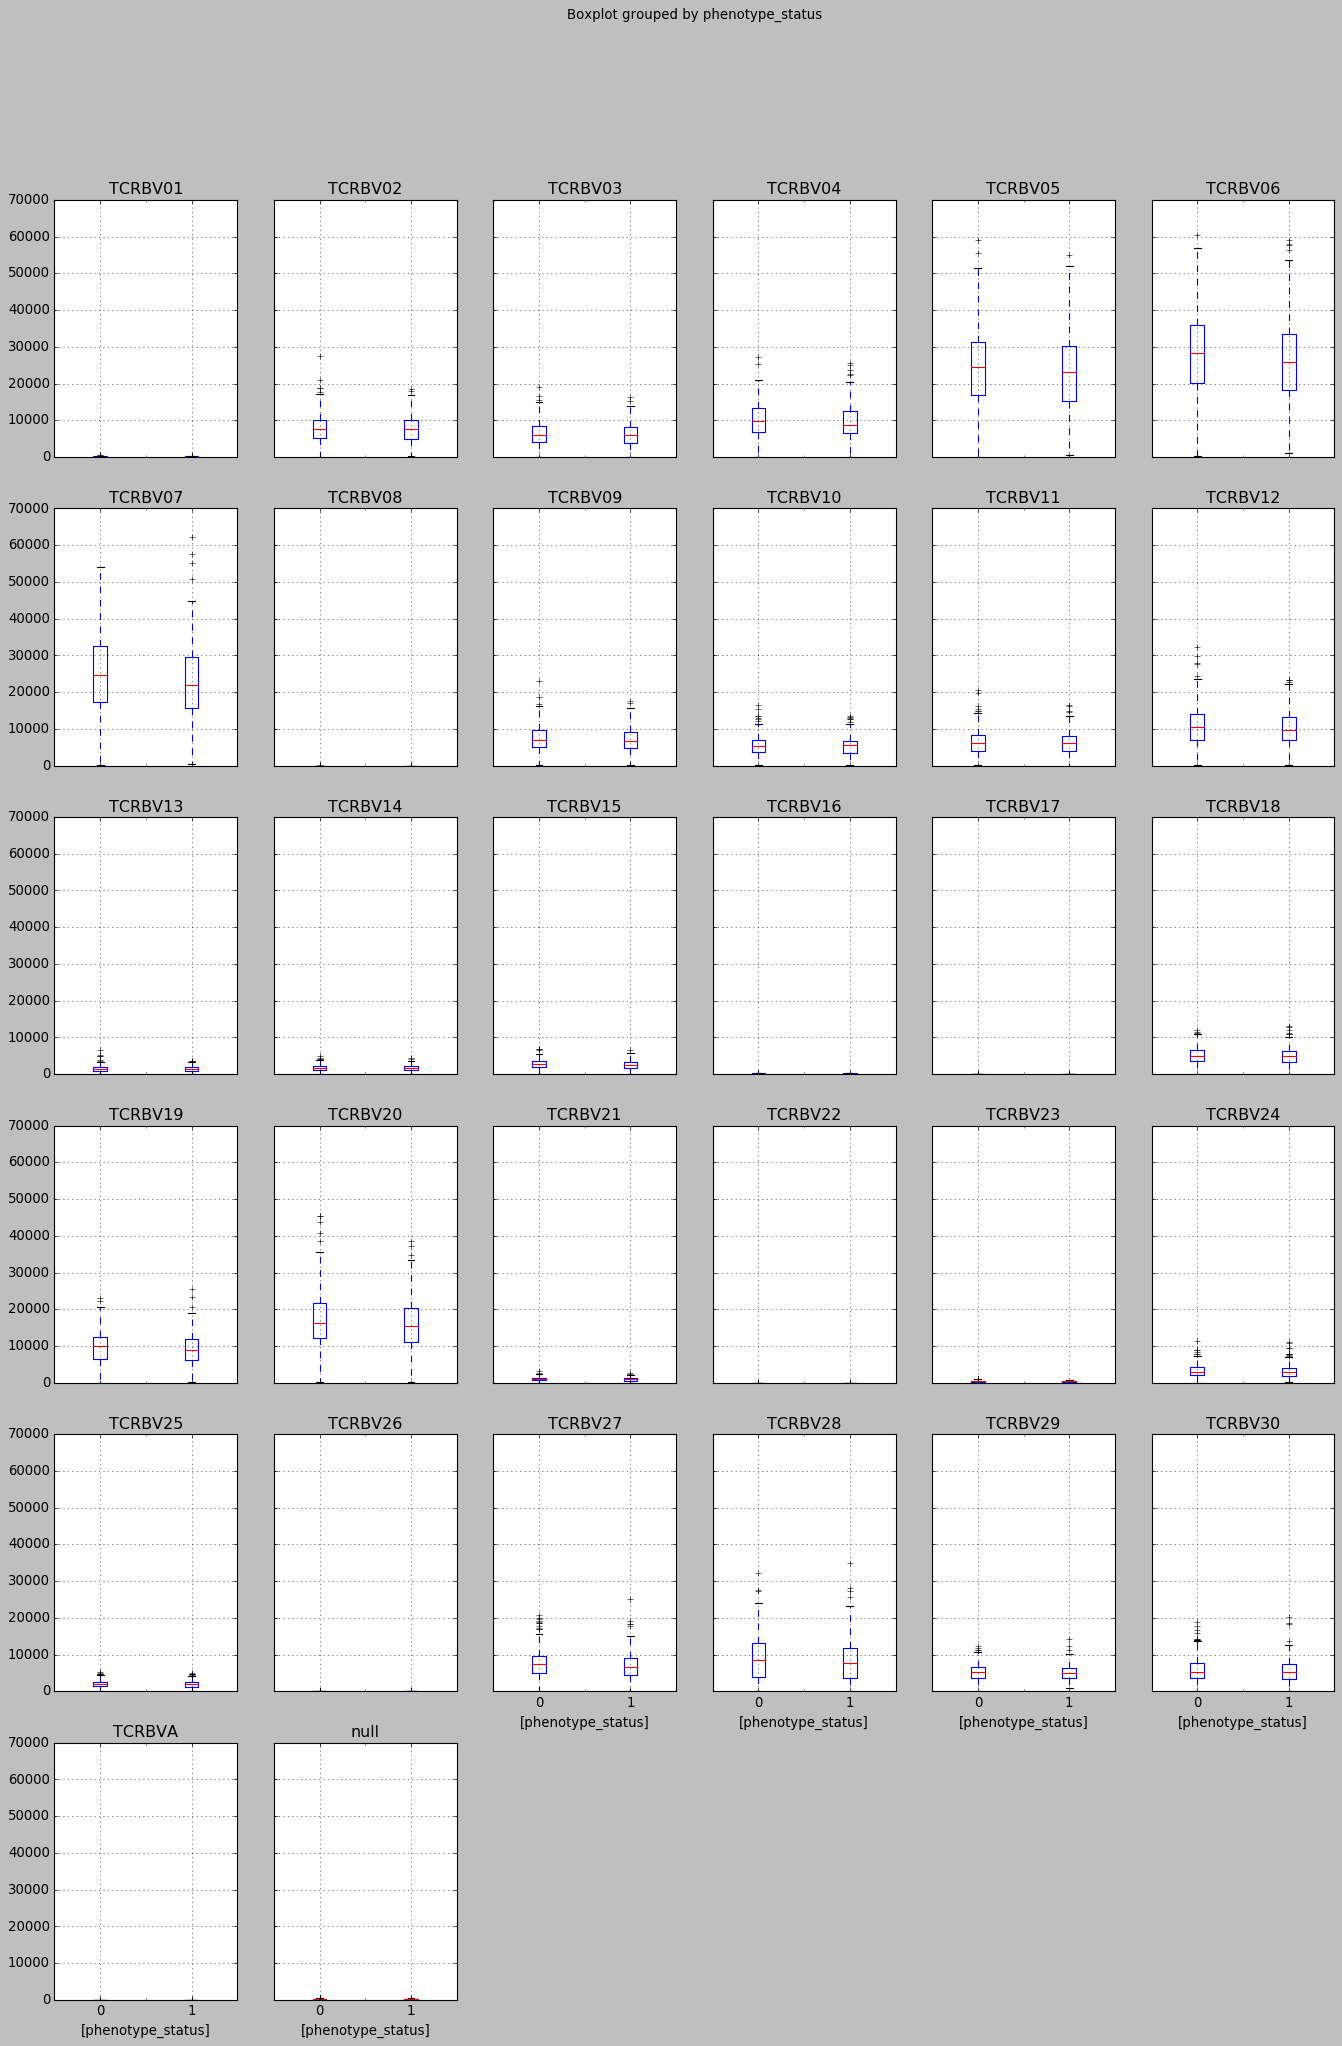

In [14]:
boxplot = v_family.drop(['sample_name'],axis=1).boxplot(by='phenotype_status',figsize=(20,30))